In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import seaborn as sns

## Вспоминаем прошлый семинар

Считаем данные о станциях московского метрополитена в 2014 году:

In [3]:
metro_data = pd.read_csv('metro_2014_pairwise.csv')

Формат такой: две станции записаны в одной строке, если между ними есть перегон.

Загрузим данные в граф из подготовленной таблицы:



In [12]:
metro_graph = nx.from_pandas_edgelist(metro_data, 
                                      source='Start station', 
                                      target='End station')

# Указываем, что направление перегона между станциями нас не интересует.
# (как правило, можем поехать в обе стороны)
metro_graph = nx.to_undirected(metro_graph)

print(nx.info(metro_graph))

Name: 
Type: GraphView
Number of nodes: 194
Number of edges: 229
Average degree:   2.3608


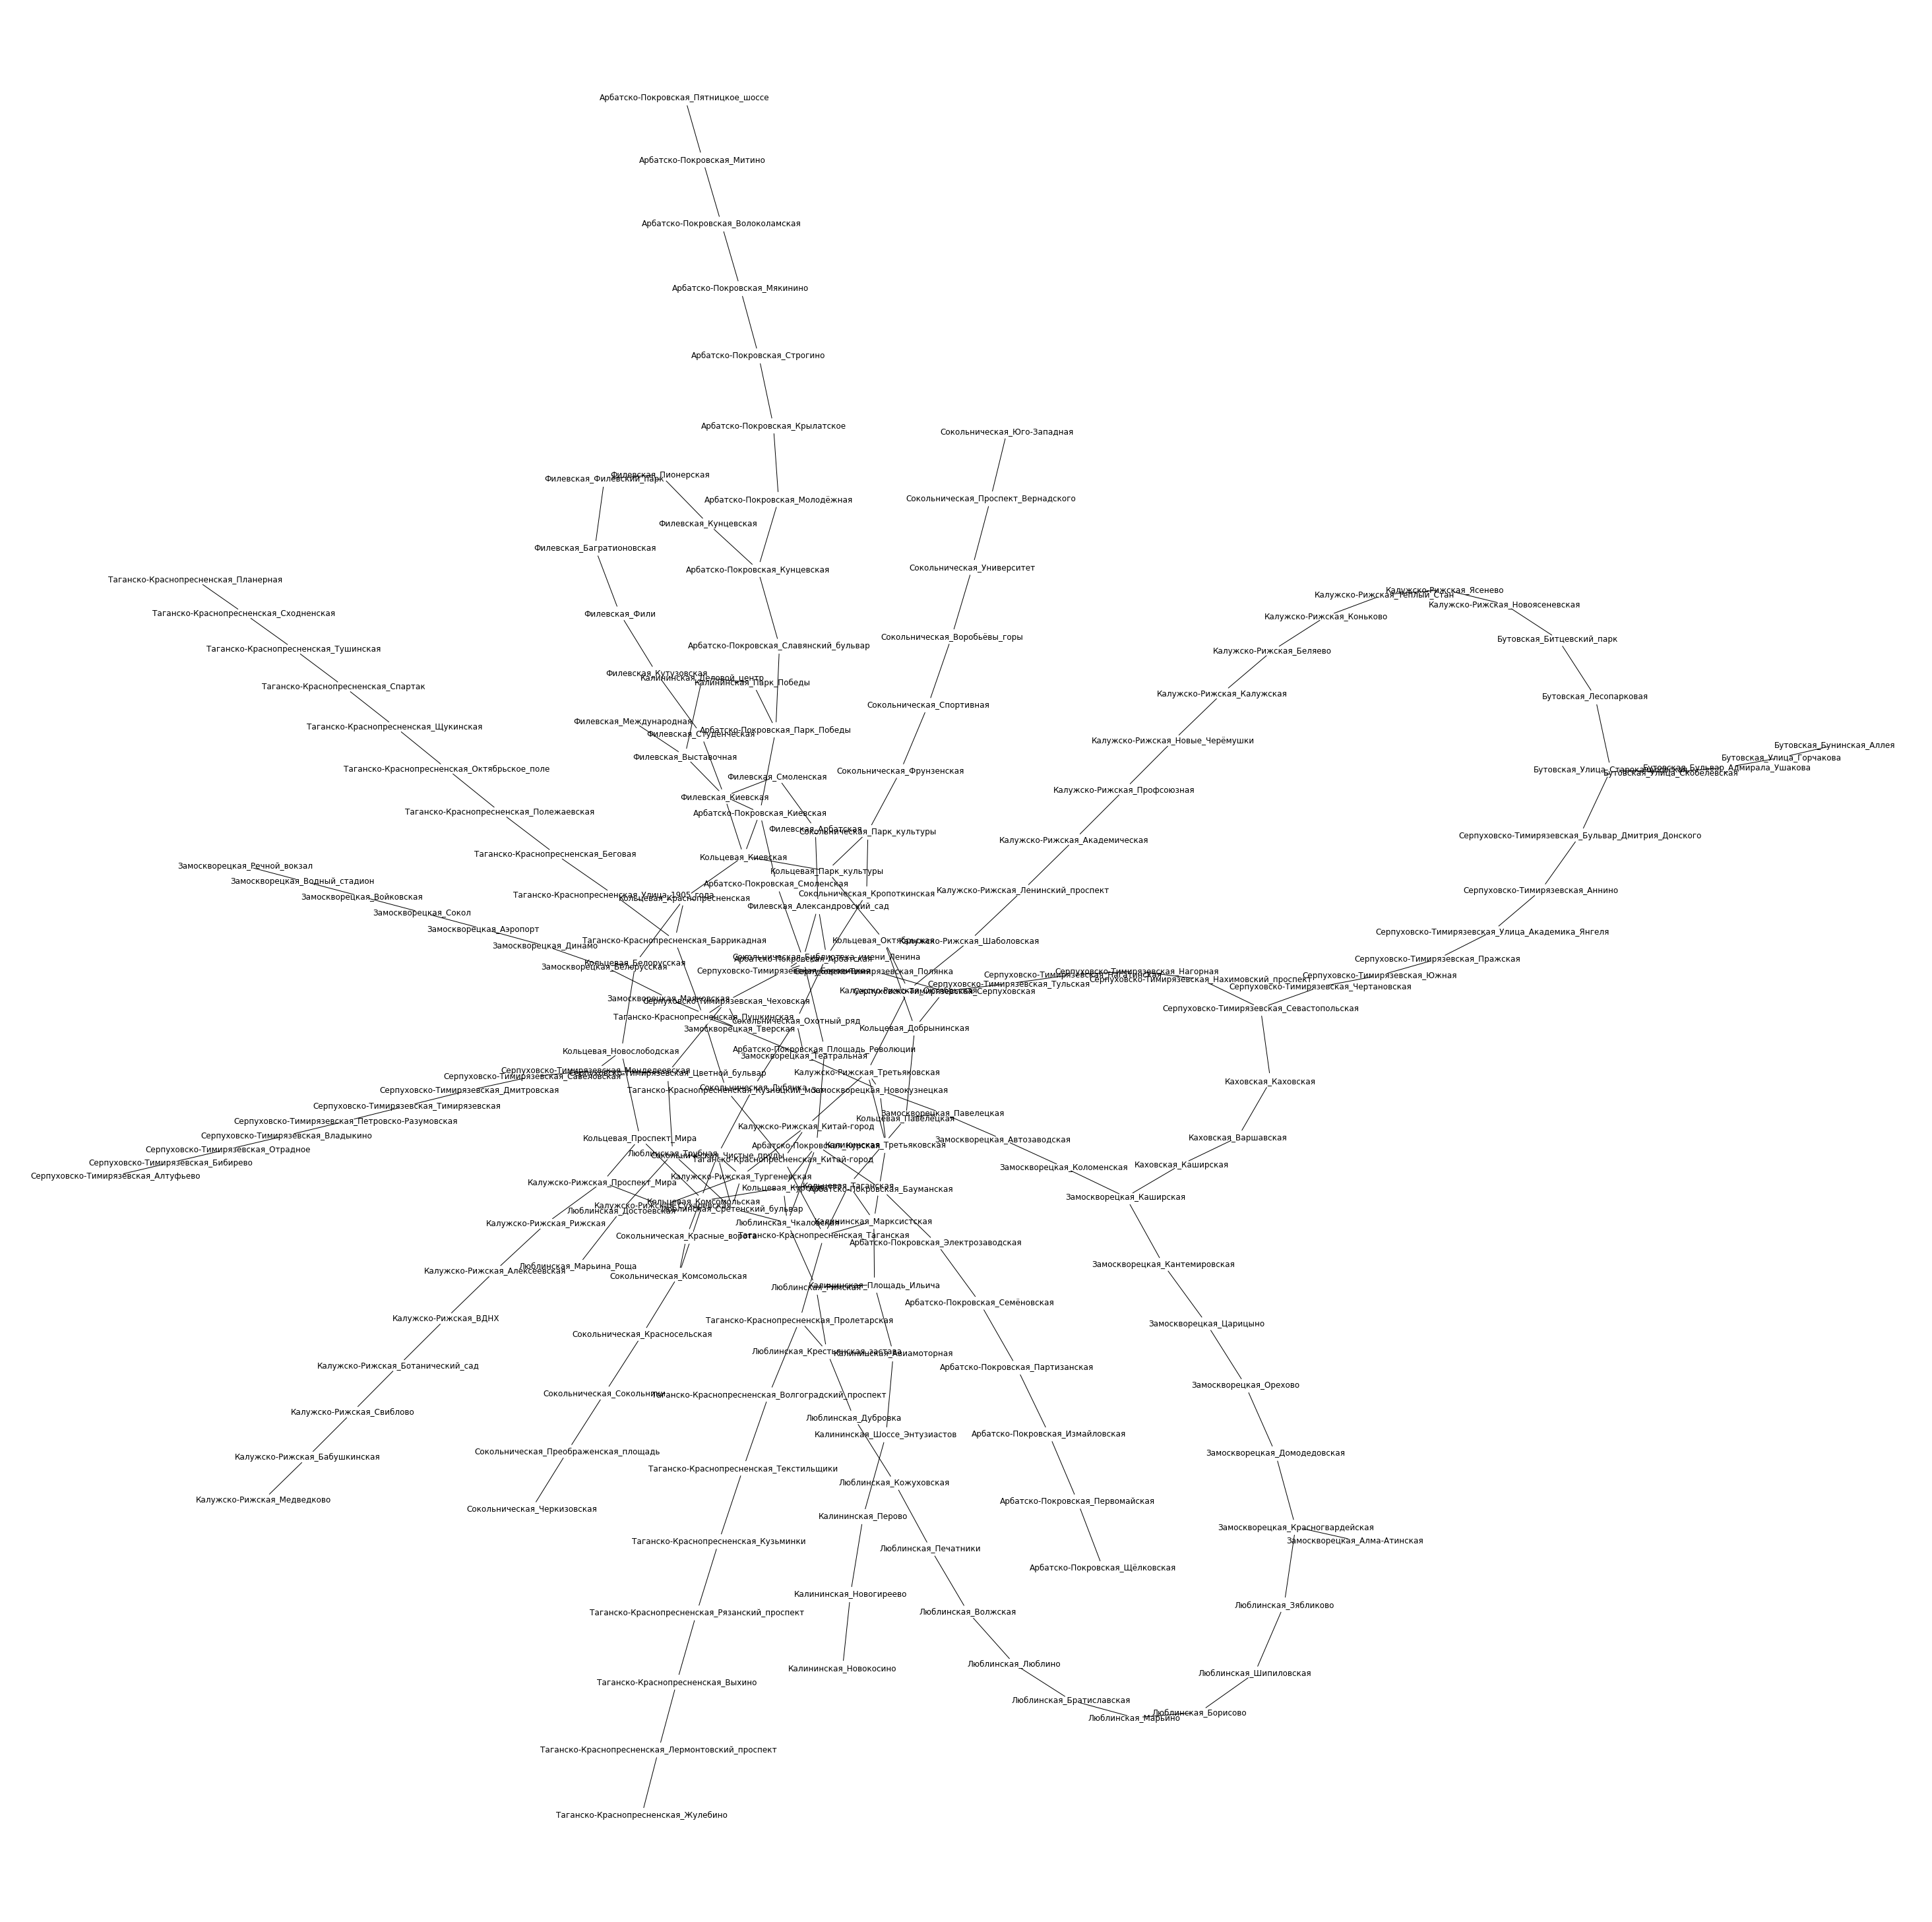

In [7]:
plt.figure(figsize=(40, 40)) 

# Можно поэкспериментировать со способом отрисовки: помимо draw_networkx есть такие:
# draw_circular, draw_spectral, draw_random, etc.
nx.draw_kamada_kawai(metro_graph, with_labels=True, node_color='white', node_size=500)

### Метрики на графе

In [18]:
nx.density(metro_graph) # вычисляем плотность сети

0.012232252550611613

In [19]:
nx.transitivity(metro_graph) # вычислим коэффициент кластеризации для графа:

0.064

In [16]:
# вычисляем центральность
degree = nx.degree_centrality(metro_graph)
betweenness = nx.betweenness_centrality(metro_graph)
closeness = nx.closeness_centrality(metro_graph)

In [17]:
graph_measures = {
    'degree': degree,
    'betweenness': betweenness,
    'closeness': closeness,
}

pd.DataFrame(graph_measures)

,degree,betweenness,closeness
Арбатско-Покровская_Арбатская,0.025907,0.104926,0.137367
Арбатско-Покровская_Бауманская,0.010363,0.060557,0.119876
Арбатско-Покровская_Волоколамская,0.010363,0.020617,0.065446
Арбатско-Покровская_Измайловская,0.010363,0.020617,0.082128
Арбатско-Покровская_Киевская,0.020725,0.142770,0.126226
Арбатско-Покровская_Крылатское,0.010363,0.050734,0.080719
Арбатско-Покровская_Кунцевская,0.015544,0.090819,0.095121
Арбатско-Покровская_Курская,0.020725,0.122354,0.134965
Арбатско-Покровская_Митино,0.010363,0.010363,0.061485
Арбатско-Покровская_Молодёжная,0.010363,0.060557,0.087370


Посмотрим, какие станции обладают максимальными показателями и проинтерпретируем:

In [10]:
pd.DataFrame(graph_measures).sort_values(by='betweenness', ascending=False)

,degree,betweenness,closeness
Кольцевая_Киевская,0.020725,0.182014,0.133195
Арбатско-Покровская_Киевская,0.020725,0.142770,0.126226
Кольцевая_Парк_культуры,0.015544,0.142050,0.133564
Серпуховско-Тимирязевская_Серпуховская,0.015544,0.136287,0.130142
Кольцевая_Октябрьская,0.015544,0.129519,0.136782
Калужско-Рижская_Октябрьская,0.015544,0.128211,0.133195
Кольцевая_Добрынинская,0.015544,0.125638,0.137464
Серпуховско-Тимирязевская_Тульская,0.010363,0.122698,0.118043
Арбатско-Покровская_Курская,0.020725,0.122354,0.134965
Кольцевая_Краснопресненская,0.015544,0.120683,0.131293


## Реальные данные

Подгрузка данных из файла-не таблицы осуществляется достаточно просто, если данные записаны в правильном формате. 

Примеры наиболее популярных форматов для чтения и сохранения графов (больше можно найти в документации NetworkX):
- список смежных вершин (`nx.read_adjlist`, `nx.write_adjlist`, именно так хранятся графы в NetworkX)
- список всех рёбер (`nx.read_edgelist`, `nx.write_edgelist`)

Первые строки нашего файла `facebook_combined.txt` выглядят так:
```
214328887 34428380
17116707 28465635
380580781 18996905
221036078 153460275
107830991 17868918
151338729 222261763
```

Каждое число обозначает имя вершины (грубо говоря, id пользователя) в графе. Если в одной строке записана пара чисел, значит, пользователи с соответствующими номерами находятся друг у друга в списке друзей.

In [20]:
facebook_users = nx.read_edgelist("facebook_combined.txt")

Узнайте, сколько граф содержит вершин и связей:

In [22]:
print('Number of nodes:', facebook_users.number_of_nodes())
print('Number of edges:', facebook_users.number_of_edges())

Number of nodes: 4039
Number of edges: 88234


Попробуем нарисовать граф (может занять около минуты, поскольку вершин достаточно много):

Wall time: 1min 15s


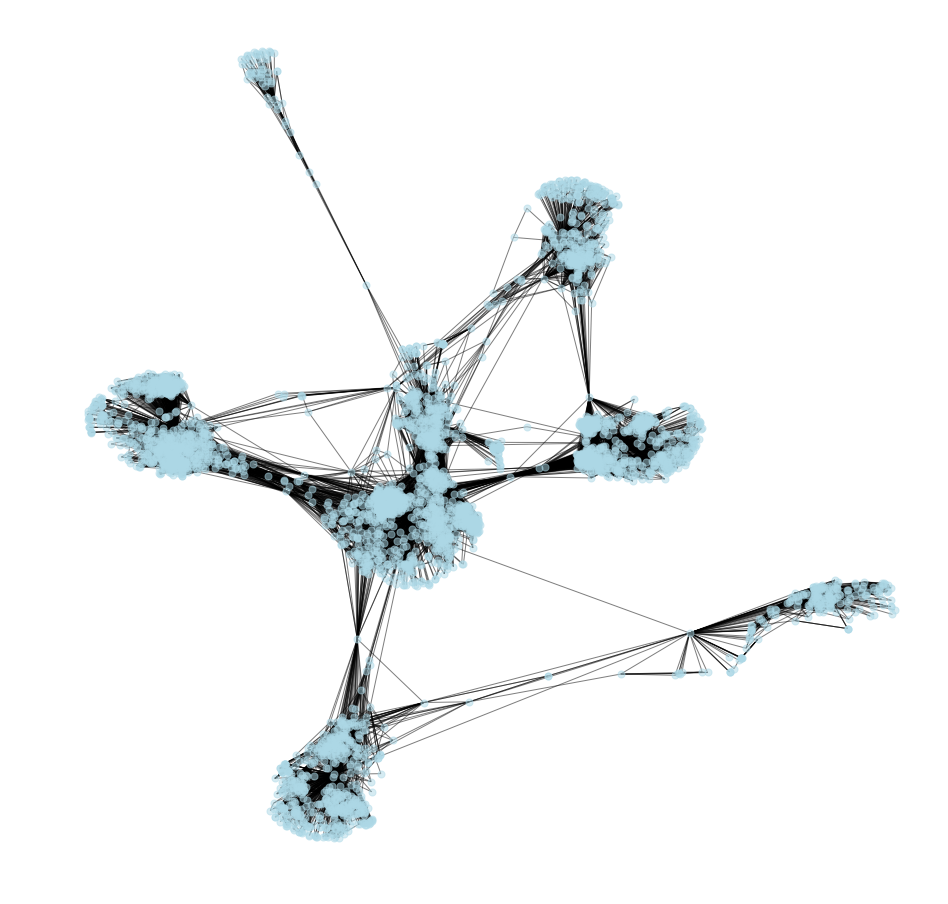

In [23]:
%%time
plt.figure(figsize=(16, 16))
nx.draw_networkx(facebook_users, node_color='lightblue', with_labels=False, node_size=50, alpha=0.5)
plt.axis('off')

Нарисуем график, отражающий распределение степеней вершины:

Text(0.5,1,'Facebook users connectivity degrees')

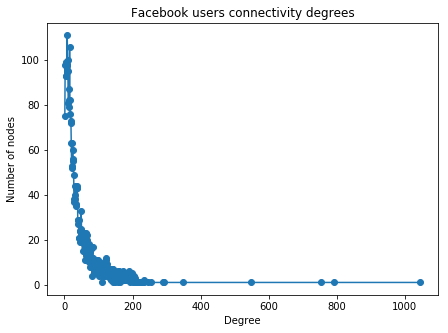

In [24]:
degrees = dict(facebook_users.degree()) # dictionary node:degree
values = sorted(set(degrees.values()))
g_hist = [list(degrees.values()).count(x) for x in values]

plt.figure(figsize=(7, 5))
plt.plot(values, g_hist, 'o-') # degree

plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook users connectivity degrees')

Это считается быстро:

In [44]:
%%time
degree = nx.degree_centrality(facebook_users)
print (degree)

{'0': 0.08593363051015354, '1': 0.004210004952947003, '2': 0.0024764735017335313, '3': 0.004210004952947003, '4': 0.0024764735017335313, '5': 0.0032194155522535907, '6': 0.0014858841010401188, '7': 0.004952947003467063, '8': 0.001981178801386825, '9': 0.014115898959881128, '10': 0.0024764735017335313, '11': 0.00024764735017335313, '12': 0.00024764735017335313, '13': 0.007677067855373947, '14': 0.003714710252600297, '15': 0.00024764735017335313, '16': 0.002228826151560178, '17': 0.0032194155522535907, '18': 0.00024764735017335313, '19': 0.00396235760277365, '20': 0.003714710252600297, '21': 0.016097077761267953, '22': 0.0027241208519068845, '23': 0.004210004952947003, '24': 0.00396235760277365, '25': 0.017087667161961365, '26': 0.016840019811788013, '27': 0.0012382367508667657, '28': 0.0032194155522535907, '29': 0.0032194155522535907, '30': 0.004210004952947003, '31': 0.005695889053987122, '32': 0.0014858841010401188, '33': 0.0004952947003467063, '34': 0.0012382367508667657, '35': 0.000

In [46]:
%%time
eigen = nx.eigenvector_centrality(facebook_users)
print(eigen)

{'0': 3.3917961722702005e-05, '1': 6.045346134948106e-07, '2': 2.2334609371911963e-07, '3': 6.63564808392105e-07, '4': 2.2364157028893598e-07, '5': 1.1833221118435212e-06, '6': 2.1709041695161255e-07, '7': 2.568510124822488e-05, '8': 2.1973746334830277e-07, '9': 2.214116624486093e-06, '10': 7.70856704409262e-07, '11': 2.1031233303459659e-07, '12': 2.1031233303459659e-07, '13': 1.1037905475985728e-06, '14': 2.3055679294325333e-07, '15': 2.1031233303459659e-07, '16': 2.616513592117461e-07, '17': 2.2774170298520136e-07, '18': 2.1031233303459659e-07, '19': 2.314909211860284e-07, '20': 2.303887574112188e-07, '21': 2.5965755464539653e-05, '22': 1.0365420550578178e-06, '23': 2.3278559554674642e-07, '24': 2.4875636881516764e-07, '25': 2.092047740990878e-06, '26': 2.3336210782441306e-06, '27': 3.850049336881093e-07, '28': 2.2763281506591423e-07, '29': 2.927663311548732e-07, '30': 9.629120440105805e-07, '31': 1.4530295555049818e-06, '32': 2.1726560021384552e-07, '33': 2.116271213063482e-07, '34'

А это -- несколько минут, можно запустить заранее:

In [47]:
%%time
betweenness = nx.betweenness_centrality(facebook_users)
print (betweenness)

{'0': 0.14630592147442917, '1': 2.7832744209034606e-06, '2': 7.595021178512074e-08, '3': 1.6850656559280464e-06, '4': 1.8403320547933104e-07, '5': 2.205964164092193e-06, '6': 2.4537760730577472e-08, '7': 0.0001702984836730339, '8': 2.7604980821899654e-07, '9': 1.6454236303026905e-05, '10': 4.986739552037655e-08, '11': 0.0, '12': 0.0, '13': 1.7622717578436846e-06, '14': 5.582871686568508e-07, '15': 0.0, '16': 1.9979459275532697e-07, '17': 4.1066669000480344e-07, '18': 0.0, '19': 5.062957964075819e-06, '20': 6.793693332142838e-07, '21': 0.0009380243844653233, '22': 6.703002200833232e-07, '23': 6.860348937590618e-06, '24': 1.3673472422981514e-07, '25': 5.38808313945586e-05, '26': 1.935436798204632e-05, '27': 3.067220091322184e-08, '28': 3.812160659244892e-07, '29': 1.3954817951917517e-06, '30': 1.3694627409316544e-06, '31': 4.932641252790837e-06, '32': 0.0, '33': 0.0, '34': 0.0036020881281963652, '35': 0.0, '36': 2.726417858953052e-08, '37': 0.0, '38': 7.344481172858835e-07, '39': 9.54863

In [48]:
%%time
closeness = nx.closeness_centrality(facebook_users)
print (closeness)

{'0': 0.35334266713335666, '1': 0.2613761408505405, '2': 0.26125776397515527, '3': 0.2613761408505405, '4': 0.26125776397515527, '5': 0.2613084837895554, '6': 0.26119016817593793, '7': 0.2747686445291236, '8': 0.2612239617026782, '9': 0.2620546433902265, '10': 0.26125776397515527, '11': 0.26110572259941806, '12': 0.26110572259941806, '13': 0.26161321671525756, '14': 0.2613423079412336, '15': 0.26110572259941806, '16': 0.2612408617454875, '17': 0.2613084837895554, '18': 0.26110572259941806, '19': 0.2613592233009709, '20': 0.2613423079412336, '21': 0.2756125861715924, '22': 0.2612746683921061, '23': 0.2613761408505405, '24': 0.2613592233009709, '25': 0.26225888160031174, '26': 0.26224184959085595, '27': 0.2611732746911584, '28': 0.2613084837895554, '29': 0.2613084837895554, '30': 0.2613761408505405, '31': 0.2614776921582594, '32': 0.26119016817593793, '33': 0.26112260734609416, '34': 0.3033125516412529, '35': 0.26112260734609416, '36': 0.2612746683921061, '37': 0.26110572259941806, '38':

In [49]:
graph_measures = {
    'degree': degree,
    'betweenness': betweenness,
    'closeness': closeness,
    'eigenvector': eigen,
}

pd.DataFrame(graph_measures).head()

,degree,betweenness,closeness,eigenvector
0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,0.004210,2.783274e-06,0.261376,6.045346e-07
10,0.002476,4.986740e-08,0.261258,7.708567e-07
100,0.002229,5.316515e-07,0.261241,2.690027e-07
1000,0.003962,1.606295e-06,0.315321,2.014017e-06
